In [3]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

In [4]:
dataset_path = "../datasets/lsa64_dataset_openpose_80_frames_augmented.csv"
output_path = "../dataset_output/lsa64_images/imgs/"

In [5]:
train = pd.read_csv(dataset_path)

In [7]:
train = train.drop("Unnamed: 0", axis=1)

In [8]:
train

,category,video_name,frame,hand_0_0_x,hand_0_0_y,hand_0_0_z,hand_0_1_x,hand_0_1_y,hand_0_1_z,hand_0_2_x,...,pose_22_y,pose_22_z,pose_23_x,pose_23_y,pose_23_z,pose_24_x,pose_24_y,pose_24_z,missing_hand,missing_face
0,1,001_001_001.mp4,1,0.557995,0.944853,0.363025,0.538670,0.990662,0.072256,0.526957,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,False,False
1,1,001_001_001.mp4,2,0.557992,0.945950,0.366478,0.539255,0.989671,0.074984,0.527544,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,False,False
2,1,001_001_001.mp4,3,0.557876,0.945462,0.389607,0.538725,0.984666,0.079201,0.527699,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,False,False
3,1,001_001_001.mp4,4,0.557848,0.945605,0.395565,0.538737,0.980610,0.080987,0.526575,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,False,False
4,1,001_001_001.mp4,5,0.557877,0.945476,0.401072,0.538728,0.984677,0.077198,0.526542,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665595,9,augmented3-009_005_002.mp4,139,0.496486,0.922451,0.175743,0.477092,0.946478,0.057440,0.471902,...,-0.005659,0.0,-0.039255,-0.005659,0.0,-0.039255,-0.005659,0.0,False,False
665596,9,augmented3-009_005_002.mp4,141,0.496011,0.922445,0.179732,0.476604,0.946488,0.057835,0.471924,...,-0.005659,0.0,-0.039255,-0.005659,0.0,-0.039255,-0.005659,0.0,False,False
665597,9,augmented3-009_005_002.mp4,143,0.497568,0.922925,0.195006,0.477399,0.946224,0.052492,0.448339,...,-0.005659,0.0,-0.039255,-0.005659,0.0,-0.039255,-0.005659,0.0,False,False
665598,9,augmented3-009_005_002.mp4,145,0.496872,0.924915,0.192743,0.478289,0.946194,0.050477,0.447021,...,-0.005659,0.0,-0.039255,-0.005659,0.0,-0.039255,-0.005659,0.0,False,False


In [9]:
train["category"].value_counts()

1     10400
10    10400
40    10400
41    10400
42    10400
      ...  
33    10400
34    10400
35    10400
36    10400
9     10400
Name: category, Length: 64, dtype: int64

In [15]:
signs = list(train.columns)

In [17]:
signs = [s for s in signs if s.startswith("hand_")]

In [18]:
signs

['hand_0_0_x',
 'hand_0_0_y',
 'hand_0_0_z',
 'hand_0_1_x',
 'hand_0_1_y',
 'hand_0_1_z',
 'hand_0_2_x',
 'hand_0_2_y',
 'hand_0_2_z',
 'hand_0_3_x',
 'hand_0_3_y',
 'hand_0_3_z',
 'hand_0_4_x',
 'hand_0_4_y',
 'hand_0_4_z',
 'hand_0_5_x',
 'hand_0_5_y',
 'hand_0_5_z',
 'hand_0_6_x',
 'hand_0_6_y',
 'hand_0_6_z',
 'hand_0_7_x',
 'hand_0_7_y',
 'hand_0_7_z',
 'hand_0_8_x',
 'hand_0_8_y',
 'hand_0_8_z',
 'hand_0_9_x',
 'hand_0_9_y',
 'hand_0_9_z',
 'hand_0_10_x',
 'hand_0_10_y',
 'hand_0_10_z',
 'hand_0_11_x',
 'hand_0_11_y',
 'hand_0_11_z',
 'hand_0_12_x',
 'hand_0_12_y',
 'hand_0_12_z',
 'hand_0_13_x',
 'hand_0_13_y',
 'hand_0_13_z',
 'hand_0_14_x',
 'hand_0_14_y',
 'hand_0_14_z',
 'hand_0_15_x',
 'hand_0_15_y',
 'hand_0_15_z',
 'hand_0_16_x',
 'hand_0_16_y',
 'hand_0_16_z',
 'hand_0_17_x',
 'hand_0_17_y',
 'hand_0_17_z',
 'hand_0_18_x',
 'hand_0_18_y',
 'hand_0_18_z',
 'hand_0_19_x',
 'hand_0_19_y',
 'hand_0_19_z',
 'hand_0_20_x',
 'hand_0_20_y',
 'hand_0_20_z',
 'hand_1_0_x',
 'hand_

In [55]:
columns = ["category", "video_name", "frame"] + signs

In [56]:
df_signs = train[columns]

In [57]:
df_signs

,category,video_name,frame,hand_0_0_x,hand_0_0_y,hand_0_0_z,hand_0_1_x,hand_0_1_y,hand_0_1_z,hand_0_2_x,...,hand_1_17_z,hand_1_18_x,hand_1_18_y,hand_1_18_z,hand_1_19_x,hand_1_19_y,hand_1_19_z,hand_1_20_x,hand_1_20_y,hand_1_20_z
0,1,001_001_001.mp4,1,0.557995,0.944853,0.363025,0.538670,0.990662,0.072256,0.526957,...,0.603125,0.205391,0.294101,0.596723,0.206035,0.272332,0.713429,0.207324,0.250563,0.812685
1,1,001_001_001.mp4,2,0.557992,0.945950,0.366478,0.539255,0.989671,0.074984,0.527544,...,0.607756,0.205534,0.294367,0.612437,0.205534,0.272729,0.693937,0.207456,0.249953,0.829405
2,1,001_001_001.mp4,3,0.557876,0.945462,0.389607,0.538725,0.984666,0.079201,0.527699,...,0.604735,0.205543,0.294494,0.587991,0.205543,0.272858,0.704603,0.207464,0.251223,0.806474
3,1,001_001_001.mp4,4,0.557848,0.945605,0.395565,0.538737,0.980610,0.080987,0.526575,...,0.600632,0.205534,0.294325,0.615200,0.205534,0.274963,0.714469,0.207456,0.249908,0.827537
4,1,001_001_001.mp4,5,0.557877,0.945476,0.401072,0.538728,0.984677,0.077198,0.526542,...,0.602991,0.205538,0.294364,0.615542,0.205538,0.275002,0.712052,0.207460,0.249947,0.826601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665595,9,augmented3-009_005_002.mp4,139,0.496486,0.922451,0.175743,0.477092,0.946478,0.057440,0.471902,...,0.018439,0.330217,0.422539,0.021780,0.339868,0.422198,0.024042,0.335433,0.425387,0.014162
665596,9,augmented3-009_005_002.mp4,141,0.496011,0.922445,0.179732,0.476604,0.946488,0.057835,0.471924,...,0.039809,0.337726,0.401356,0.067016,0.341646,0.397082,0.059926,0.337395,0.375519,0.034771
665597,9,augmented3-009_005_002.mp4,143,0.497568,0.922925,0.195006,0.477399,0.946224,0.052492,0.448339,...,0.025499,0.334652,0.412697,0.035751,0.327432,0.418018,0.030510,0.322237,0.416175,0.018872
665598,9,augmented3-009_005_002.mp4,145,0.496872,0.924915,0.192743,0.478289,0.946194,0.050477,0.447021,...,0.139661,0.338116,0.371103,0.308817,0.338229,0.374294,0.332644,0.340622,0.374210,0.149168


In [35]:
frames = 80

In [22]:
def reshape_features_dataset(features):
    return features.reshape((int(features.shape[0]/frames), frames, features.shape[1]))

def reshape_target_dataset(target):
    return target.reshape((int(target.shape[0]/frames), frames))[:, 0]

In [66]:
def get_axis_df(df, axis):
    return df[[c for c in signs if c.endswith(axis)]]

In [67]:
def normalize_landmark_name(name):
    splited_name = name.split("-")
    landmark_name = splited_name[1]
    landmark_number = splited_name[2].rjust(3, "0")
    return f"{landmark_name}-{landmark_number}"

In [25]:
def create_folder(path):
    if not os.path.exists(path):
        os.mkdir(path)

In [26]:
def landmarks_to_image(x, y, n=3, normalize=False):
    # Remove cols until the width is multiple of n
    width = x.shape[1]
    if width % n != 0:
        extra_cols = width % n
        x = x[:, : width - extra_cols]
        y = y[:, : width - extra_cols]

    X = np.reshape(x, (x.shape[0], -1, n))
    Y = np.reshape(y, (y.shape[0], -1, n))
    I = np.concatenate([X, Y], axis=1)
    return I

In [27]:
def normalize_axis(axis):
    axis[axis < 0] = 0
    axis[axis > 1] = 1
    return axis

In [46]:
videos = df_signs["video_name"].unique()
videos

array(['001_001_001.mp4', '001_001_002.mp4', '001_001_003.mp4', ...,
       'augmented3-009_007_004.mp4', 'augmented3-009_005_004.mp4',
       'augmented3-009_005_002.mp4'], dtype=object)

In [50]:
df_category.drop(["category", "video_name"], axis=1).T

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
hand_0_0_x,0.557995,0.557992,0.557876,0.557848,0.557877,0.557746,0.557768,0.557769,0.557668,0.558889,...,0.556331,0.556804,0.557647,0.558923,0.558913,0.557843,0.558347,0.558347,0.558266,0.557971
hand_0_0_y,0.944853,0.945950,0.945462,0.945605,0.945476,0.945997,0.945931,0.944930,0.947420,0.940846,...,0.940689,0.943101,0.946997,0.944375,0.945452,0.947011,0.945418,0.944437,0.944817,0.945479
hand_0_0_z,0.363025,0.366478,0.389607,0.395565,0.401072,0.398394,0.394982,0.375187,0.399336,0.407957,...,0.475867,0.457909,0.378559,0.399147,0.396182,0.397285,0.398738,0.400255,0.405364,0.444281
hand_0_1_x,0.538670,0.539255,0.538725,0.538737,0.538728,0.539958,0.539947,0.539951,0.539450,0.540845,...,0.541136,0.539881,0.546416,0.541317,0.541304,0.541786,0.541337,0.541910,0.541950,0.540565
hand_0_1_y,0.990662,0.989671,0.984666,0.980610,0.984677,0.976600,0.976591,0.978649,0.983856,0.973926,...,0.982251,0.982522,0.996911,0.982742,0.986855,0.991869,0.978682,0.983735,0.986827,0.983411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hand_1_19_y,0.272332,0.272729,0.272858,0.274963,0.275002,0.273637,0.274106,0.272681,0.273856,0.272594,...,0.318239,0.318302,0.326531,0.325912,0.328094,0.335938,0.327214,0.329528,0.328206,0.323795
hand_1_19_z,0.713429,0.693937,0.704603,0.714469,0.712052,0.708226,0.707492,0.716296,0.705639,0.715598,...,0.106658,0.119188,0.085327,0.104293,0.082841,0.088560,0.096871,0.075283,0.081194,0.099568
hand_1_20_x,0.207324,0.207456,0.207464,0.207456,0.207460,0.207350,0.207462,0.207684,0.207450,0.207343,...,0.430705,0.431432,0.427749,0.429660,0.426668,0.428132,0.431161,0.425932,0.430258,0.428550
hand_1_20_y,0.250563,0.249953,0.251223,0.249908,0.249947,0.249579,0.250189,0.250177,0.249936,0.250829,...,0.322100,0.322162,0.338155,0.332419,0.337032,0.342593,0.332421,0.342295,0.333314,0.331545


In [61]:
df_frames

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
hand_0_0_x,0.557995,0.557992,0.557876,0.557848,0.557877,0.557746,0.557768,0.557769,0.557668,0.558889,...,0.556331,0.556804,0.557647,0.558923,0.558913,0.557843,0.558347,0.558347,0.558266,0.557971
hand_0_0_y,0.944853,0.945950,0.945462,0.945605,0.945476,0.945997,0.945931,0.944930,0.947420,0.940846,...,0.940689,0.943101,0.946997,0.944375,0.945452,0.947011,0.945418,0.944437,0.944817,0.945479
hand_0_0_z,0.363025,0.366478,0.389607,0.395565,0.401072,0.398394,0.394982,0.375187,0.399336,0.407957,...,0.475867,0.457909,0.378559,0.399147,0.396182,0.397285,0.398738,0.400255,0.405364,0.444281
hand_0_1_x,0.538670,0.539255,0.538725,0.538737,0.538728,0.539958,0.539947,0.539951,0.539450,0.540845,...,0.541136,0.539881,0.546416,0.541317,0.541304,0.541786,0.541337,0.541910,0.541950,0.540565
hand_0_1_y,0.990662,0.989671,0.984666,0.980610,0.984677,0.976600,0.976591,0.978649,0.983856,0.973926,...,0.982251,0.982522,0.996911,0.982742,0.986855,0.991869,0.978682,0.983735,0.986827,0.983411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hand_1_19_y,0.272332,0.272729,0.272858,0.274963,0.275002,0.273637,0.274106,0.272681,0.273856,0.272594,...,0.318239,0.318302,0.326531,0.325912,0.328094,0.335938,0.327214,0.329528,0.328206,0.323795
hand_1_19_z,0.713429,0.693937,0.704603,0.714469,0.712052,0.708226,0.707492,0.716296,0.705639,0.715598,...,0.106658,0.119188,0.085327,0.104293,0.082841,0.088560,0.096871,0.075283,0.081194,0.099568
hand_1_20_x,0.207324,0.207456,0.207464,0.207456,0.207460,0.207350,0.207462,0.207684,0.207450,0.207343,...,0.430705,0.431432,0.427749,0.429660,0.426668,0.428132,0.431161,0.425932,0.430258,0.428550
hand_1_20_y,0.250563,0.249953,0.251223,0.249908,0.249947,0.249579,0.250189,0.250177,0.249936,0.250829,...,0.322100,0.322162,0.338155,0.332419,0.337032,0.342593,0.332421,0.342295,0.333314,0.331545


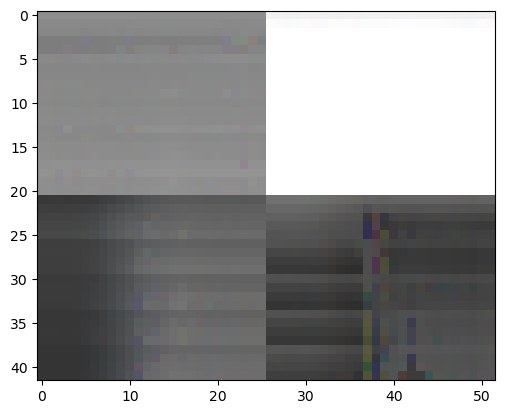

In [75]:
plt.imshow(image)

In [77]:
total_videos = len(videos)
current_video = 0
for video in videos:
    current_video += 1
    if current_video % 500 == 0:
        print("Current Video:", current_video, "of", total_videos)
    df_video = df_signs[df_signs["video_name"] == video].sort_values("frame")
    category = df_video.iloc[0]["category"]
    df = df_video.drop(["category", "video_name", "frame"], axis=1)
    x = get_axis_df(df, "x")
    y = get_axis_df(df, "y")
    x = x.T.to_numpy()
    y = y.T.to_numpy()
    x = normalize_axis(x)
    y = normalize_axis(y)
    image = landmarks_to_image(x, y)
    save_path = os.path.join(output_path, str(category), f"{video}.png")
    create_folder(os.path.join(output_path, str(category)))
    try:
        plt.imsave(save_path, image)
    except:
        print("Error saving", save_path)

Current Video: 500 of 7432
Current Video: 1000 of 7432
Current Video: 1500 of 7432
Current Video: 2000 of 7432
Current Video: 2500 of 7432
Current Video: 3000 of 7432
Current Video: 3500 of 7432
Current Video: 4000 of 7432
Current Video: 4500 of 7432
Current Video: 5000 of 7432
Current Video: 5500 of 7432
Current Video: 6000 of 7432
Current Video: 6500 of 7432
Current Video: 7000 of 7432


In [18]:
total_videos = len(df_signs)
current_video = 0
for i in df_signs.iterrows():
    current_video += 1
    if current_video % 500 == 0:
        print("Current Video:", current_video, "of", total_videos)
    row = i[1]
    df = pd.read_parquet(base_path + row["path"])
    df = df[df["type"].isin(["left_hand", "right_hand"])]
    df["landmark"] = df["row_id"].apply(lambda i: normalize_landmark_name(i))
    df = df.sort_values("landmark")
    x = get_axis_df(df, "x")
    y = get_axis_df(df, "y")
    x = x.to_numpy()
    y = y.to_numpy()
    x = normalize_axis(x)
    y = normalize_axis(y)
    image = landmarks_to_image(x, y)
    save_path = os.path.join(output_path, row["sign"], f"{row['participant_id']}-{row['sequence_id']}.png")
    create_folder(os.path.join(output_path, row["sign"]))
    try:
        plt.imsave(save_path, image)
    except:
        print("Error saving", save_path)

Current Video: 500 of 26435
Current Video: 1000 of 26435
Current Video: 1500 of 26435
Current Video: 2000 of 26435
Current Video: 2500 of 26435
Current Video: 3000 of 26435
Current Video: 3500 of 26435
Error saving ../dataset_output/google_asl/imgs/moon/4718-1577832107.png
Current Video: 4000 of 26435
Current Video: 4500 of 26435
Current Video: 5000 of 26435
Current Video: 5500 of 26435
Error saving ../dataset_output/google_asl/imgs/jacket/26734-1868735223.png
Current Video: 6000 of 26435
Current Video: 6500 of 26435
Error saving ../dataset_output/google_asl/imgs/hungry/4718-1985160633.png
Current Video: 7000 of 26435
Error saving ../dataset_output/google_asl/imgs/not/32319-2093201419.png
Current Video: 7500 of 26435
Current Video: 8000 of 26435
Error saving ../dataset_output/google_asl/imgs/puzzle/32319-2191770404.png
Error saving ../dataset_output/google_asl/imgs/can/4718-220693163.png
Current Video: 8500 of 26435
Current Video: 9000 of 26435
Error saving ../dataset_output/google_asl

In [163]:
row

path              train_landmark_files/32319/2093201419.parquet
participant_id                                            32319
sequence_id                                          2093201419
sign                                                        not
Name: 26477, dtype: object

In [130]:
row

path              train_landmark_files/26734/1000035562.parquet
participant_id                                            26734
sequence_id                                          1000035562
sign                                                       blow
Name: 0, dtype: object

In [122]:
X = np.array_split(x, x.shape[1] // 3, axis=1)
X = np.stack(X, axis=1)
Y = np.array_split(y, y.shape[1] // 3, axis=1)
Y = np.stack(Y, axis=1)
X.shape

ValueError: all input arrays must have the same shape

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


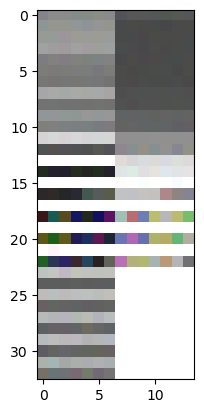

In [128]:
plt.imshow(landmarks_to_image(x, y))

In [97]:
x = df.copy()
x["landmark"] = df["row_id"].apply(lambda i: "-".join(i.split("-")[1:]))
x_values = {}
for l in x["landmark"].unique():
    x_values[l] = x[x["landmark"] == l]["x"].values
x_values
pd.DataFrame.from_dict(x_values).T
# x = x[["landmark", "x"]]
# x = pd.melt(x[["landmark", "x"]], id_vars=['landmark'], value_vars=['x'])
# x = x.set_index("landmark")
# x["x"].values.reshape(())

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
face-0,0.494400,0.501150,0.498471,0.506406,0.507809,0.512282,0.519686,0.526654,0.534279,0.537974,...,0.539496,0.540863,0.539631,0.538870,0.537460,0.538041,0.536197,0.535788,0.535696,0.536416
face-1,0.496017,0.492906,0.491770,0.496547,0.502923,0.505973,0.511610,0.515489,0.524356,0.534715,...,0.540774,0.541330,0.541150,0.540376,0.539333,0.538957,0.537321,0.537178,0.535058,0.535971
face-2,0.500818,0.498327,0.497680,0.502239,0.508405,0.512122,0.517218,0.519985,0.527824,0.537330,...,0.542549,0.543044,0.542850,0.542128,0.541073,0.540639,0.539162,0.538990,0.537231,0.537866
face-3,0.489788,0.487708,0.487321,0.491887,0.498103,0.502142,0.508275,0.512669,0.520244,0.529460,...,0.535133,0.535540,0.535418,0.534454,0.533305,0.532867,0.531290,0.530816,0.528941,0.529734
face-4,0.495304,0.492322,0.491236,0.496049,0.502395,0.505442,0.511242,0.515550,0.524563,0.534917,...,0.541114,0.541668,0.541508,0.540682,0.539613,0.539233,0.537561,0.537360,0.535184,0.536143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
right_hand-16,0.422241,0.440972,0.460872,0.467546,0.473871,0.473521,0.445551,0.401285,0.320296,0.217971,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001660
right_hand-17,0.282980,0.304759,0.321579,0.326890,0.337585,0.325513,0.305635,0.272736,0.233316,0.185122,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042694
right_hand-18,0.313736,0.335886,0.358558,0.365960,0.372476,0.352425,0.326248,0.282339,0.221445,0.150808,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006723
right_hand-19,0.350728,0.377429,0.400531,0.403416,0.414791,0.390784,0.352488,0.299400,0.220874,0.132357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.014755


In [58]:
df[df["type"] == "pose"].sort_values("row_id")

,frame,row_id,type,landmark_index,x,y,z
489,20,20-pose-0,pose,0,0.524597,0.329134,-0.976228
490,20,20-pose-1,pose,1,0.566472,0.284107,-0.913417
499,20,20-pose-10,pose,10,0.482853,0.377581,-0.780198
500,20,20-pose-11,pose,11,0.830147,0.563290,-0.303732
501,20,20-pose-12,pose,12,0.312736,0.523624,-0.185898
...,...,...,...,...,...,...,...
12440,42,42-pose-5,pose,5,0.487127,0.295725,-0.969664
12441,42,42-pose-6,pose,6,0.467742,0.296605,-0.969754
12442,42,42-pose-7,pose,7,0.664733,0.318926,-0.587208
12443,42,42-pose-8,pose,8,0.449085,0.320256,-0.447975


In [57]:
df["type"].value_counts()

face          10764
pose            759
left_hand       483
right_hand      483
Name: type, dtype: int64